In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **4 inputs training model**

In [2]:
#import required packages
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import tensorflow as tf

from keras.regularizers import l2, l1
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]
# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "IDNAME", "Country"]
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"]

# ISO3 is a country variable

# df_columns = ["MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]

# MVAR1 -> Total positive/confirmed
# MVAR2 -> Total death
# MVAR3 -> Total recovered
# MVAR4 -> No of people quarantined


#read the data
df = pd.read_csv("/content/drive/MyDrive/CCR-Lab-Plus/covid_world_n.csv", header=0, usecols=df_columns)
# df.reset_index(drop=True)
df.index = df['DATE']
# df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_korea_n.csv", header=0)
# df=df["ISO3"][70000:]
dd = df[df["ISO3"] == "KOR"]
# # sk = df["Country"] == "Republic of Korea"
dd = dd[:560]
# # dd.head()
dd.head()

,ISO3,MVAR1,DATE,MVAR2,MVAR3,MVAR4,OVAR1,OVAR3,OVAR5,OVAR7,OVAR11,OVAR13,OVAR15,OVAR21,OVAR24,OVAR40
DATE,,,,,,,,,,,,,,,,
31DEC19,KOR,NaN,31DEC19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01JAN20,KOR,NaN,01JAN20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02JAN20,KOR,NaN,02JAN20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03JAN20,KOR,NaN,03JAN20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04JAN20,KOR,NaN,04JAN20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
ddf = dd.dropna()
print("AFter dropping: ", len(ddf))
print("Original data: ", len(dd))
print("Original data shape: ", ddf.shape)

AFter dropping:  537
Original data:  560
Original data shape:  (537, 16)


In [4]:
def parse(x):
	return datetime.strptime(x, '%d%b%y')

ddf["DATE"] = ddf["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
ddf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ISO3,MVAR1,DATE,MVAR2,MVAR3,MVAR4,OVAR1,OVAR3,OVAR5,OVAR7,OVAR11,OVAR13,OVAR15,OVAR21,OVAR24,OVAR40
DATE,,,,,,,,,,,,,,,,
23JAN20,KOR,1.0,2020-01-23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24JAN20,KOR,2.0,2020-01-24,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25JAN20,KOR,2.0,2020-01-25,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26JAN20,KOR,3.0,2020-01-26,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27JAN20,KOR,4.0,2020-01-27,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Replacing OVAR7, OVAR15, OVAR21 values with binary values. 
ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
ddf["OVAR21"].replace({0: 0, 2: 1}, inplace=True)

date = ddf["DATE"]
# ddf.drop(columns=["DATE", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"], axis=1, inplace=True)
ddf.drop(columns=["DATE", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"], axis=1, inplace=True)
ddf.head() 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MVAR1,MVAR2,MVAR3,MVAR4,OVAR1
DATE,,,,,
23JAN20,1.0,0.0,0.0,1.0,0.0
24JAN20,2.0,0.0,0.0,2.0,0.0
25JAN20,2.0,0.0,0.0,2.0,0.0
26JAN20,3.0,0.0,0.0,3.0,0.0
27JAN20,4.0,0.0,0.0,4.0,0.0


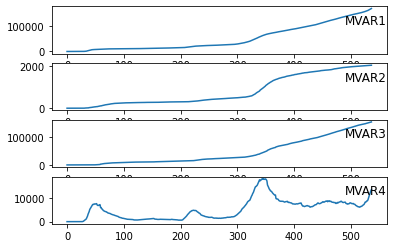

In [6]:
from pandas import read_csv
from matplotlib import pyplot
# ddf["OVAR1"].replace({0: 1, 1: 2, 2: 3, 3: 4,4:5}, inplace=True)
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [13, 10]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(ddf.columns[group], y=0.5, loc='right')
	i += 1

plt.savefig('4_variables_graph.png')
pyplot.show()

#### **LSTM DATA PREPARATION**

In [7]:
import numpy as np
# ddf = ddf.astype(np.int64)

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

dataset = ddf
values = dataset.values

print("Dataset shape after cleaning: ", values.shape)
# X_scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
# # X_scaler = MinMaxScaler(feature_range=(0, 1))
# # X_data = X_scaler.fit_transform(values)
# X_data = X_scaler.fit_transform(values)
# Y_data = Y_scaler.fit_transform(dataset[['MVAR1']])

# Y_data = Y_scaler.fit_transform(data[['traffic_volume']]) 

Dataset shape after cleaning:  (537, 5)


In [8]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# integer encode direction
values = values.astype('float32')

# encoder = LabelEncoder()
# values = encoder.fit_transform(values)
# ensure all data is float

# normalize features
# scaler = MinMaxScaler(feature_range=(0, 4))
scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# we will add below line if we just want to forecast one variable for 1 day. 
# reframed.drop(reframed.columns[[51,52,53,54,55,56,57,58,59]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[61,62,63,64,65,66,67,68,69,70,71]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[85,86,87,88,89,90,91,92,93,94,95]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[99,100,101,102,103,104,105,106,107,108,109,110,111]], axis=1, inplace=True)

print(reframed.shape)

# 24 input features and 8 output features 

(534, 20)


In [ ]:
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,-1.000000,-1.0,-1.0,-1.000000,-1.0,-0.999988,-1.0,-1.0,-0.999889,-1.0,-0.999988,-1.0,-1.0,-0.999889,-1.0,-0.999977,-1.0,-1.0,-0.999779,-1.0
4,-0.999988,-1.0,-1.0,-0.999889,-1.0,-0.999988,-1.0,-1.0,-0.999889,-1.0,-0.999977,-1.0,-1.0,-0.999779,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0
5,-0.999988,-1.0,-1.0,-0.999889,-1.0,-0.999977,-1.0,-1.0,-0.999779,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0
6,-0.999977,-1.0,-1.0,-0.999779,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0
7,-0.999965,-1.0,-1.0,-0.999668,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0,-0.999965,-1.0,-1.0,-0.999668,-1.0


In [9]:
# split into train and test sets
values = reframed.values
n_train_hours = 430
# n_train_hours = 472
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)


Training data shape:  (430, 20)
Testing data shape:  (104, 20)


In [10]:
# split into input and outputs
n_obs = n_hours * n_features
print(n_obs)
train_X, train_y = train[:, :n_obs], train[:, -5:]
test_X, test_y = test[:, :n_obs], test[:, -5:]
print("Training split shape: ", train_X.shape, len(train_X), train_y.shape)
print("Testing split shape: ", test_X.shape, len(test_X), test_y.shape)


# Here we are taking previous 14 days data so it becomes like 14 * 14 (features) and the output is 14 which is different then the input

15
Training split shape:  (430, 15) 430 (430, 5)
Testing split shape:  (104, 15) 104 (104, 5)


In [11]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# (total data, time steps/total days, total features)

(430, 3, 5) (430, 5) (104, 3, 5) (104, 5)


In [ ]:
Err_Bi=[]
Err_Lstm=[]
tries=100

for i in range(tries):
  test_y_inter=np.copy(test_y)
  model = Sequential()
  model.add(Bidirectional(LSTM(184, return_sequences=True, activation='tanh'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))
  # model.add(Bidirectional(LSTM(124, return_sequences=True, activation='tanh'), merge_mode="concat"))

  model.add(Bidirectional(LSTM(164, activation='tanh'), merge_mode="concat"))  # best neurons 164 or 124
  # 1st layer 164, 2nd layer 164

  # model.add(LSTM(32, activation="tanh"))
  model.add(Dense(train_y.shape[1]))

  adam = tf.keras.optimizers.Adam()
  ear_stop = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss', patience=100,  # best is 100
      mode='min', restore_best_weights=True
  )
  # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
  rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=30)  # factor is 0.4 patience 30
  model.compile(loss=tf.losses.MeanAbsoluteError(),
                metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)


  history = model.fit(train_X, train_y, epochs=800, callbacks = [rlrop], batch_size=108, validation_data=(test_X, test_y), verbose=0, shuffle=True)  # batch_size  best 108   -> shuffle True
  yhat = model.predict(test_X)

  inv_yhat = scaler.inverse_transform(yhat)
  test_y = test_y.reshape((len(test_y), 5))  # we need to change reshape value here. 
  inv_y = scaler.inverse_transform(test_y)
  err_bilstm= MAE(inv_yhat, inv_y)
  Err_Bi.append(err_bilstm)
  model.save('BiLstm_pol1_'+str(i)+'.h5')
  #------------------------------------------------------------------------------------------------------------------
  model = Sequential()
  model.add(LSTM(184, activation="tanh", return_sequences=True))
  # model.add(LSTM(400, activation="tanh"))
  model.add(LSTM(164, activation="tanh"))
  # model.add(LSTM(100, activation="tanh"))
  model.add(Dense(train_y.shape[1]))

  adam = tf.keras.optimizers.Adam()
  ear_stop = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss', patience=100,  # best is 100
      mode='min', restore_best_weights=True
  )
  # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
  rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.10, patience=100)  # factor is 0.42 patience 30
  model.compile(loss=tf.losses.MeanAbsoluteError(),
                metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

  history = model.fit(train_X, train_y, epochs=800, callbacks = [ rlrop], batch_size=108, validation_data=(test_X, test_y), verbose=0, shuffle=False)  # batch_size  best 108   -> shuffle false
  yhat = model.predict(test_X)
  inv_yhat = scaler.inverse_transform(yhat)
  test_y = test_y_inter.reshape((len(test_y_inter), 5))  # we need to change reshape value here. 
  inv_y = scaler.inverse_transform(test_y)
  err_lstm= MAE(inv_yhat, inv_y)
  Err_Lstm.append(err_lstm)
  model.save('Lstm_pol1_'+str(i)+'.h5')


KeyboardInterrupt: ignored

In [ ]:
objective=[x1 - x2 for (x1, x2) in zip(Err_Bi,Err_Lstm)]
index_of_models=objective.index(min(objective))
print(index_of_models)

7


In [13]:
index_of_models=7
from tensorflow import keras
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

model_lstm = keras.models.load_model('Lstm_pol1_'+str(index_of_models)+'.h5')
model_bilstm = keras.models.load_model('BiLstm_pol1_'+str(index_of_models)+'.h5')

#---------------------Bi-LSTM---------------------------------------------------
yhat = model_bilstm.predict(test_X)
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(test_y)
print("------------------------Bi-LSTM-----------------------------------------------")
mae = MAE(inv_yhat[:,0], inv_y[:,0])
print("Positive MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,0], inv_y[:,0])
print("Positive MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('Positive RMSE: %.3f' % rmse)

#--------------------------------------------
mae = MAE(inv_yhat[:,1], inv_y[:,1])
print("Death MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,1], inv_y[:,1])
print("Death MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('Death RMSE: %.3f' % rmse)


#--------------------------------------------
mae = MAE(inv_yhat[:,2], inv_y[:,2])
print("Recovered MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,2], inv_y[:,2])
print("Recovered MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,2], inv_yhat[:,2]))
print('Recovered RMSE: %.3f' % rmse)

#--------------------------------------------
mae = MAE(inv_yhat[:,3], inv_y[:,3])
print("Quarantined MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,3], inv_y[:,3])
print("Quarantined MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,3], inv_yhat[:,3]))
print('Quarantined RMSE: %.3f' % rmse)


#---------------------LSTM---------------------------------------------------
yhat = model_lstm.predict(test_X)
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(test_y)
print("------------------------LSTM-----------------------------------------------")

mae = MAE(inv_yhat[:,0], inv_y[:,0])
print("Positive MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,0], inv_y[:,0])
print("Positive MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('Positive RMSE: %.3f' % rmse)

#--------------------------------------------
mae = MAE(inv_yhat[:,1], inv_y[:,1])
print("Death MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,1], inv_y[:,1])
print("Death MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('Death RMSE: %.3f' % rmse)


#--------------------------------------------
mae = MAE(inv_yhat[:,2], inv_y[:,2])
print("Recovered MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,2], inv_y[:,2])
print("Recovered MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,2], inv_yhat[:,2]))
print('Recovered RMSE: %.3f' % rmse)

#--------------------------------------------
mae = MAE(inv_yhat[:,3], inv_y[:,3])
print("Quarantined MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,3], inv_y[:,3])
print("Quarantined MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,3], inv_yhat[:,3]))
print('Quarantined RMSE: %.3f' % rmse)


------------------------Bi-LSTM-----------------------------------------------
Positive MAE:  564.72437
Positive MAPE:  0.004050527
Positive RMSE: 862.432
Death MAE:  17.384932
Death MAPE:  0.008870779
Death RMSE: 19.530
Recovered MAE:  485.17645
Recovered MAPE:  0.0038067342
Recovered RMSE: 657.979
Quarantined MAE:  336.387
Quarantined MAPE:  0.04296617
Quarantined RMSE: 504.118
------------------------LSTM-----------------------------------------------
Positive MAE:  14135.397
Positive MAPE:  0.112124555
Positive RMSE: 16200.053
Death MAE:  65.76729
Death MAPE:  0.032503374
Death RMSE: 72.159
Recovered MAE:  14080.726
Recovered MAPE:  0.12134934
Recovered RMSE: 16065.007
Quarantined MAE:  389.73898
Quarantined MAPE:  0.048041232
Quarantined RMSE: 645.205
